In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

# reading the dataset
insuranceDF = pd.read_csv('../data/Machine-Learning-with-R-datasets-master/insurance2.csv')
print(insuranceDF.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [3]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


                     age       sex       bmi  children    smoker    region   charges  insuranceclaim
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008        0.113723
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292        0.031565
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341        0.384198
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998       -0.409526
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251        0.333261
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208        0.020891
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000        0.309418
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891  0.309418        1.000000


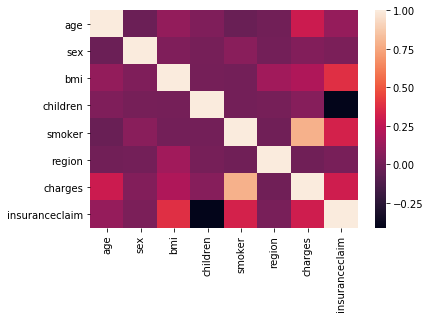

In [4]:
corr = insuranceDF.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [6]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1300]
dfCheck = insuranceDF[1300:]

trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim', 1))
testLabel = np.asarray(dfTest['insuranceclaim'])
testData = np.asarray(dfTest.drop('insuranceclaim', 1))

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
accuracy = insuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  85.66666666666667 %


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings

warnings.filterwarnings('ignore')

#load data
df = pd.read_csv("../data/Machine-Learning-with-R-datasets-master/insurance.csv")
df = df.dropna()

# general information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Data Distribution Analysis


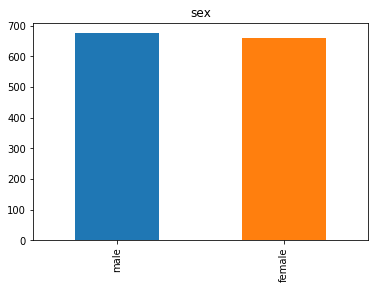

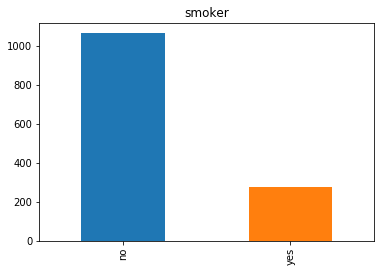

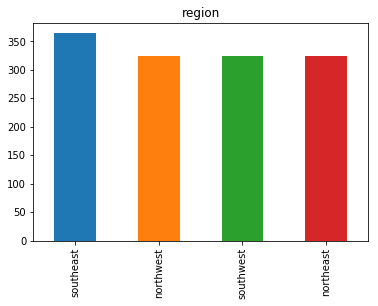

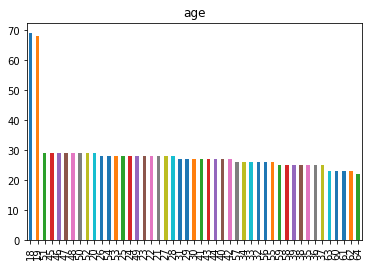

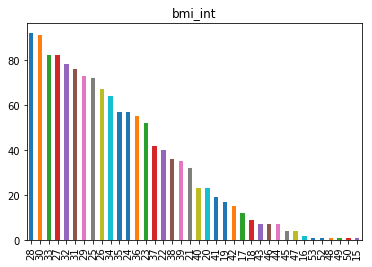

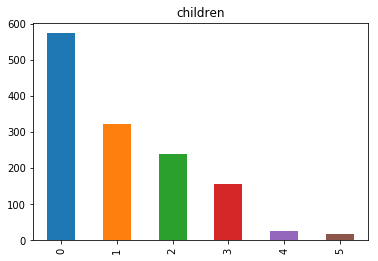

In [4]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))
variables = ['sex', 'smoker', 'region', 'age', 'bmi_int', 'children']

print('Data Distribution Analysis')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind='bar')
    plt.title(v)
    plt.show()

Mean cost analysis:


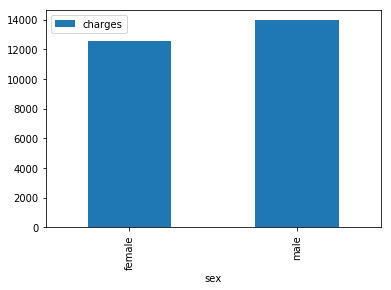

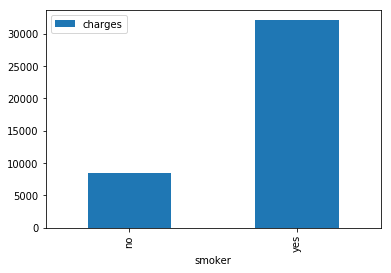

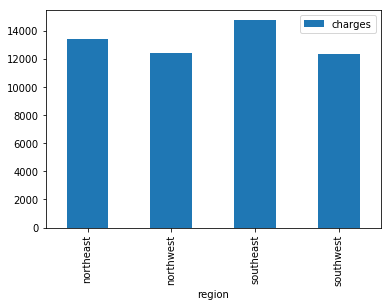

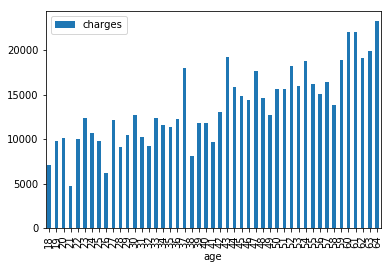

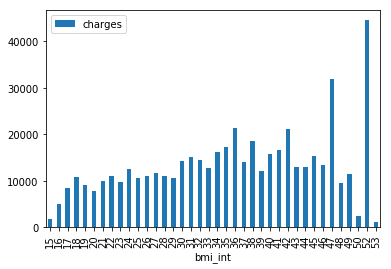

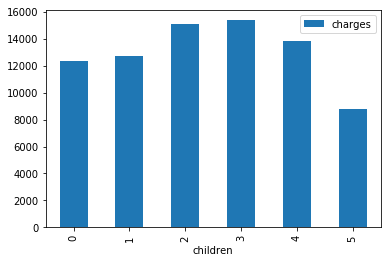

In [8]:
#average cost analysis
print('Mean cost analysis:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

Variables Pairplot


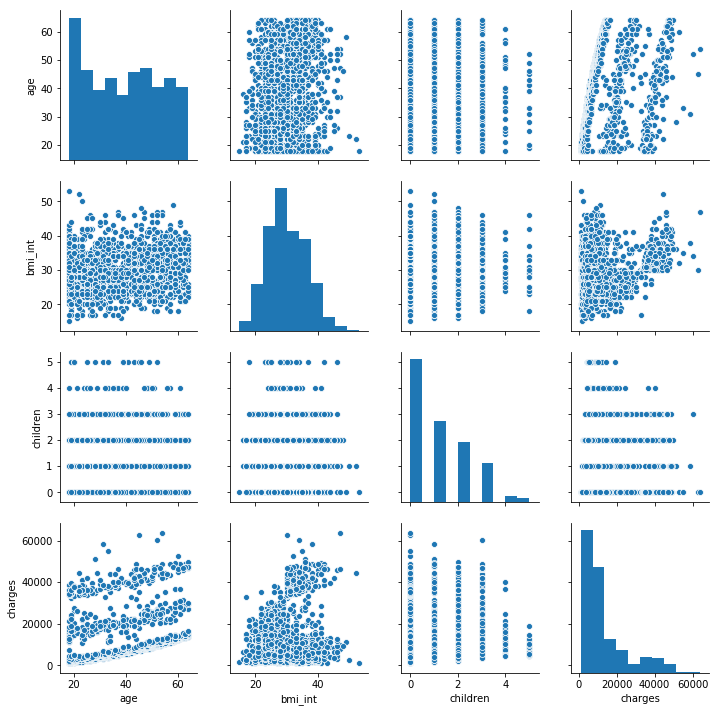

In [9]:
#variables pairplot
print('Variables Pairplot')
variables = ['sex', 'smoker', 'age', 'bmi_int', 'children', 'charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [12]:
print('Model training and evaluating')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex', 'smoker', 'region', 'age', 'bmi', 'children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X)
Y = df['charges']
X_train, X_test,  y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train mode
regressor = ExtraTreesRegressor(n_estimators=200)
regressor.fit(X_train, y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result')
print('Train MAE:', sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print('Test MAE:', sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Model training and evaluating
ExtraTreesRegressor evaluating result
Train MAE: 11.683379953302525
Train RMSE: 270.2373612509658
Test MAE: 2691.79910676
Test RMSE: 5107.816815025964


Features Importance Ranking


1.smoker(0.634976)
2.bmi(0.185634)
3.age(0.120661)
4.children(0.025774)
5.region(0.023004)
6.sex(0.009953)


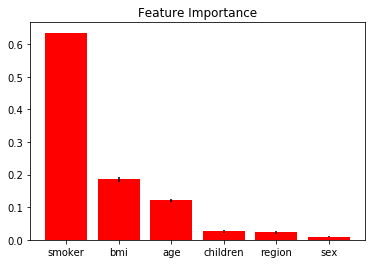

In [15]:
print('Features Importance Ranking\n\n')
importances = regressor.feature_importances_

std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

#plot the feature importances
plt.figure()
plt.title('Feature Importance')
plt.bar(importance_list, importances[indices], color='r', yerr=std[indices], align="center")
plt.show()

In [16]:
print('Prediction on new data\n\n')

billy = ['male', 'yes', 'southeast', 25, 30.5, 2]
print("Billy - ", str(billy))

billy[0] = le_sex.transform([billy[0]])[0]
billy[1] = le_smoker.transform([billy[1]])[0]
billy[2] = le_region.transform([billy[2]])[0]

X = sc.transform([billy])

cost_for_billy = regressor.predict(X)[0]
print('Cost for Billy = ',cost_for_billy,'\n\n')


dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.transform([dennis[0]])[0] 
dennis[1] = le_smoker.transform([dennis[1]])[0] 
dennis[2] = le_region.transform([dennis[2]])[0] 

X = sc.transform([dennis])

cost_for_dennis = regressor.predict(X)[0]

print('Cost for Dennis = ',cost_for_dennis)

Prediction on new data


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Billy =  34415.60512639997 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Dennis =  14233.405588849995
